# Data Exploration

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [2]:
# Proportion of trips on this date as compared to Avg number of trips on the same day of week in baseline period i.e 1st

In [3]:
df = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [4]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
5931,Daily,2020-06-15,1.0,Seattle-Tacoma International,64,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5932,Daily,2020-10-15,1.0,Seattle-Tacoma International,74,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5933,Daily,2020-04-01,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5934,Daily,2020-05-12,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [5]:
countries = df.groupby(["Country"])["Country"].count().reset_index(name = "Count Country")

# Retrieve Long and Lat Coordiantes


In [6]:
def getLat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [7]:
def getLong(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

In [8]:
df["lat"] = df["Centroid"].map(getLat)
df["long"] = df["Centroid"].map(getLong)

In [9]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,lat,long
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",-33.945977,151.180088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,Daily,2020-06-15,1.0,Seattle-Tacoma International,64,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",47.450583,-122.308662
5932,Daily,2020-10-15,1.0,Seattle-Tacoma International,74,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",47.450583,-122.308662
5933,Daily,2020-04-01,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",47.450583,-122.308662
5934,Daily,2020-05-12,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1...",47.450583,-122.308662


In [10]:
# split dataframe into USA and CA
canada = df.loc[df["Country"] == "Canada"]
usa = df.loc[df["Country"] == "United States of America (the)"]
temp = [usa, canada]
na = pd.concat(temp)

In [11]:
# cities in CA and USA
canadaCities = canada.groupby(["City"])["City"].count().reset_index(name = "Count City")
usaCities = usa.groupby(["City"])["City"].count().reset_index(name = "Count City")
naCities = na.groupby(["City"])["City"].count().reset_index(name = "Count City")

In [12]:
naCities

,City,Count City
0,Boston,214
1,Calgary,214
2,Charlotte,214
3,Chicago,214
4,College Park,215
5,Denver,214
6,Dorval,215
7,Floris,214
8,Grapevine,215
9,Halifax,205


In [13]:
rankNA = na.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankCA = canada.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")
rankUSA = usa.groupby("AirportName").mean().sort_values(by = "PercentOfBaseline")

In [14]:
rankCA

,Version,PercentOfBaseline,lat,long
AirportName,,,,
Halifax International,1.0,54.351220,44.883017,-63.511672
Toronto Pearson,1.0,56.042056,43.679352,-79.631344
Edmonton International,1.0,70.370370,53.308783,-113.576261
Montreal Trudeau,1.0,71.162791,45.467844,-73.742412
Vancouver International,1.0,75.929907,49.193579,-123.177541
Montreal Mirabel,1.0,85.538095,45.681503,-74.048380
Calgary International,1.0,88.084112,51.118475,-114.013123
Hamilton International,1.0,88.816901,43.172036,-79.926693
Winnipeg International,1.0,89.658879,49.902471,-97.219062


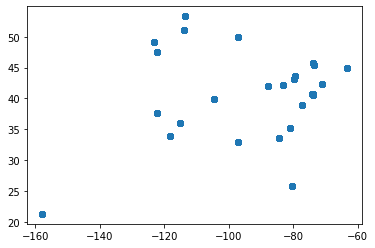

In [15]:
plt.scatter(x=na['long'], y=na['lat'], alpha = 0.4)